# Imports

In [1]:
import pandas as pd
from diive.core.times.times import insert_timestamp
from diive.core.io.files import save_parquet, load_parquet

# Load REddyProc results

In [2]:
nee50_df = pd.read_csv("33.02_FLUXES_L4.1_MDSgapfilled_NEE_CUT_50_20241205130350.csv")
nee16_df = pd.read_csv("33.04_FLUXES_L4.1_MDSgapfilled_NEE_CUT_16_20241205130356.csv")
nee84_df = pd.read_csv("33.06_FLUXES_L4.1_MDSgapfilled_NEE_CUT_84_20241205130404.csv")
le_df = pd.read_csv("33.08_FLUXES_L4.1_MDSgapfilled_LE_20241205130412.csv")
h_df = pd.read_csv("33.10_FLUXES_L4.1_MDSgapfilled_H_20241205130420.csv")

In [3]:
# [c for c in h_df.columns if str(c).startswith("H_")]
# [print(c) for c in nee50_df.columns];

# Format results

In [4]:
def format(df: pd.DataFrame, keepcols: str):
    
    # Format timestamp to show middle of averaging interval:
    df = df.set_index("TIMESTAMP")
    df.index.name = "TIMESTAMP_END"
    df.index = pd.to_datetime(df.index, format='ISO8601')
    df = df.asfreq("30min")
    df = insert_timestamp(data=df, convention="middle", set_as_index=True)
    
    # Keep columns
    keep = [c for c in df.columns if str(c).startswith(keepcols)]
    df = df[keep].copy()
    
    # # Rename flux partitioning columns:
    # fpcols = [c for c in df.columns if "FP_" in c]
    # fpcols_renamed = [f"{c}_{suffix}" for c in fpcols]
    # rename_dict = dict(zip(fpcols, fpcols_renamed))  # using dict() and zip() to convert lists to dictionary
    # df = df.rename(columns=rename_dict, inplace=False)
    return df    

In [5]:
nee16_df = format(df=nee16_df, keepcols="NEE_")
nee50_df = format(df=nee50_df, keepcols="NEE_")
nee84_df = format(df=nee84_df, keepcols="NEE_")
le_df = format(df=le_df, keepcols="LE_")
h_df = format(df=h_df, keepcols="H_")

In [6]:
nee50_df

,NEE_CUT_50_orig,NEE_CUT_50_f,NEE_CUT_50_fqc,NEE_CUT_50_fall,NEE_CUT_50_fall_qc,NEE_CUT_50_fnum,NEE_CUT_50_fsd,NEE_CUT_50_fmeth,NEE_CUT_50_fwin
TIMESTAMP_MIDDLE,,,,,,,,,
2005-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-31 21:45:00,NaN,1.262247,1.0,1.262247,1.0,2.0,0.101649,1.0,14.0
2023-12-31 22:15:00,NaN,-4.601671,1.0,-4.601671,1.0,3.0,10.156859,1.0,14.0
2023-12-31 22:45:00,NaN,-4.601671,1.0,-4.601671,1.0,3.0,10.156859,1.0,14.0


# Merge REddyProc results

In [7]:
merged = nee50_df.copy()
newcols = [c for c in nee16_df.columns if c not in merged.columns]
merged = pd.concat([merged, nee16_df[newcols]], axis=1)
newcols = [c for c in nee84_df.columns if c not in merged.columns]
merged = pd.concat([merged, nee84_df[newcols]], axis=1)
newcols = [c for c in le_df.columns if c not in merged.columns]
merged = pd.concat([merged, le_df[newcols]], axis=1)
newcols = [c for c in h_df.columns if c not in merged.columns]
merged = pd.concat([merged, h_df[newcols]], axis=1)
merged

,NEE_CUT_50_orig,NEE_CUT_50_f,NEE_CUT_50_fqc,NEE_CUT_50_fall,NEE_CUT_50_fall_qc,NEE_CUT_50_fnum,NEE_CUT_50_fsd,NEE_CUT_50_fmeth,NEE_CUT_50_fwin,NEE_CUT_16_orig,NEE_CUT_16_f,NEE_CUT_16_fqc,NEE_CUT_16_fall,NEE_CUT_16_fall_qc,NEE_CUT_16_fnum,...,LE_fall,LE_fall_qc,LE_fnum,LE_fsd,LE_fmeth,LE_fwin,H_orig,H_f,H_fqc,H_fall,H_fall_qc,H_fnum,H_fsd,H_fmeth,H_fwin
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 21:45:00,NaN,1.262247,1.0,1.262247,1.0,2.0,0.101649,1.0,14.0,NaN,1.348560,1.0,1.348560,1.0,3.0,...,-1.72376,1.0,3.0,1.444758,1.0,14.0,NaN,-15.399825,1.0,-15.399825,1.0,12.0,12.555280,1.0,14.0
2023-12-31 22:15:00,NaN,-4.601671,1.0,-4.601671,1.0,3.0,10.156859,1.0,14.0,NaN,-3.070957,1.0,-3.070957,1.0,4.0,...,-1.72376,1.0,3.0,1.444758,1.0,14.0,-28.038447,-28.038447,0.0,-14.101359,1.0,15.0,11.454304,1.0,14.0
2023-12-31 22:45:00,NaN,-4.601671,1.0,-4.601671,1.0,3.0,10.156859,1.0,14.0,NaN,-3.070957,1.0,-3.070957,1.0,4.0,...,-1.72376,1.0,3.0,1.444758,1.0,14.0,-29.190743,-29.190743,0.0,-14.101359,1.0,15.0,11.454304,1.0,14.0


# Export

In [8]:
filename = "33.12_REddyProc_L4.1"
merged.to_csv(f"{filename}.csv", index=True)
save_parquet(data=merged, filename=filename)

Saved file 33.12_REddyProc_L4.1.parquet (0.490 seconds).


'33.12_REddyProc_L4.1.parquet'

# Plots

In [9]:
# merged['NEE_CUT_50_orig'].groupby(merged.index.year).count()

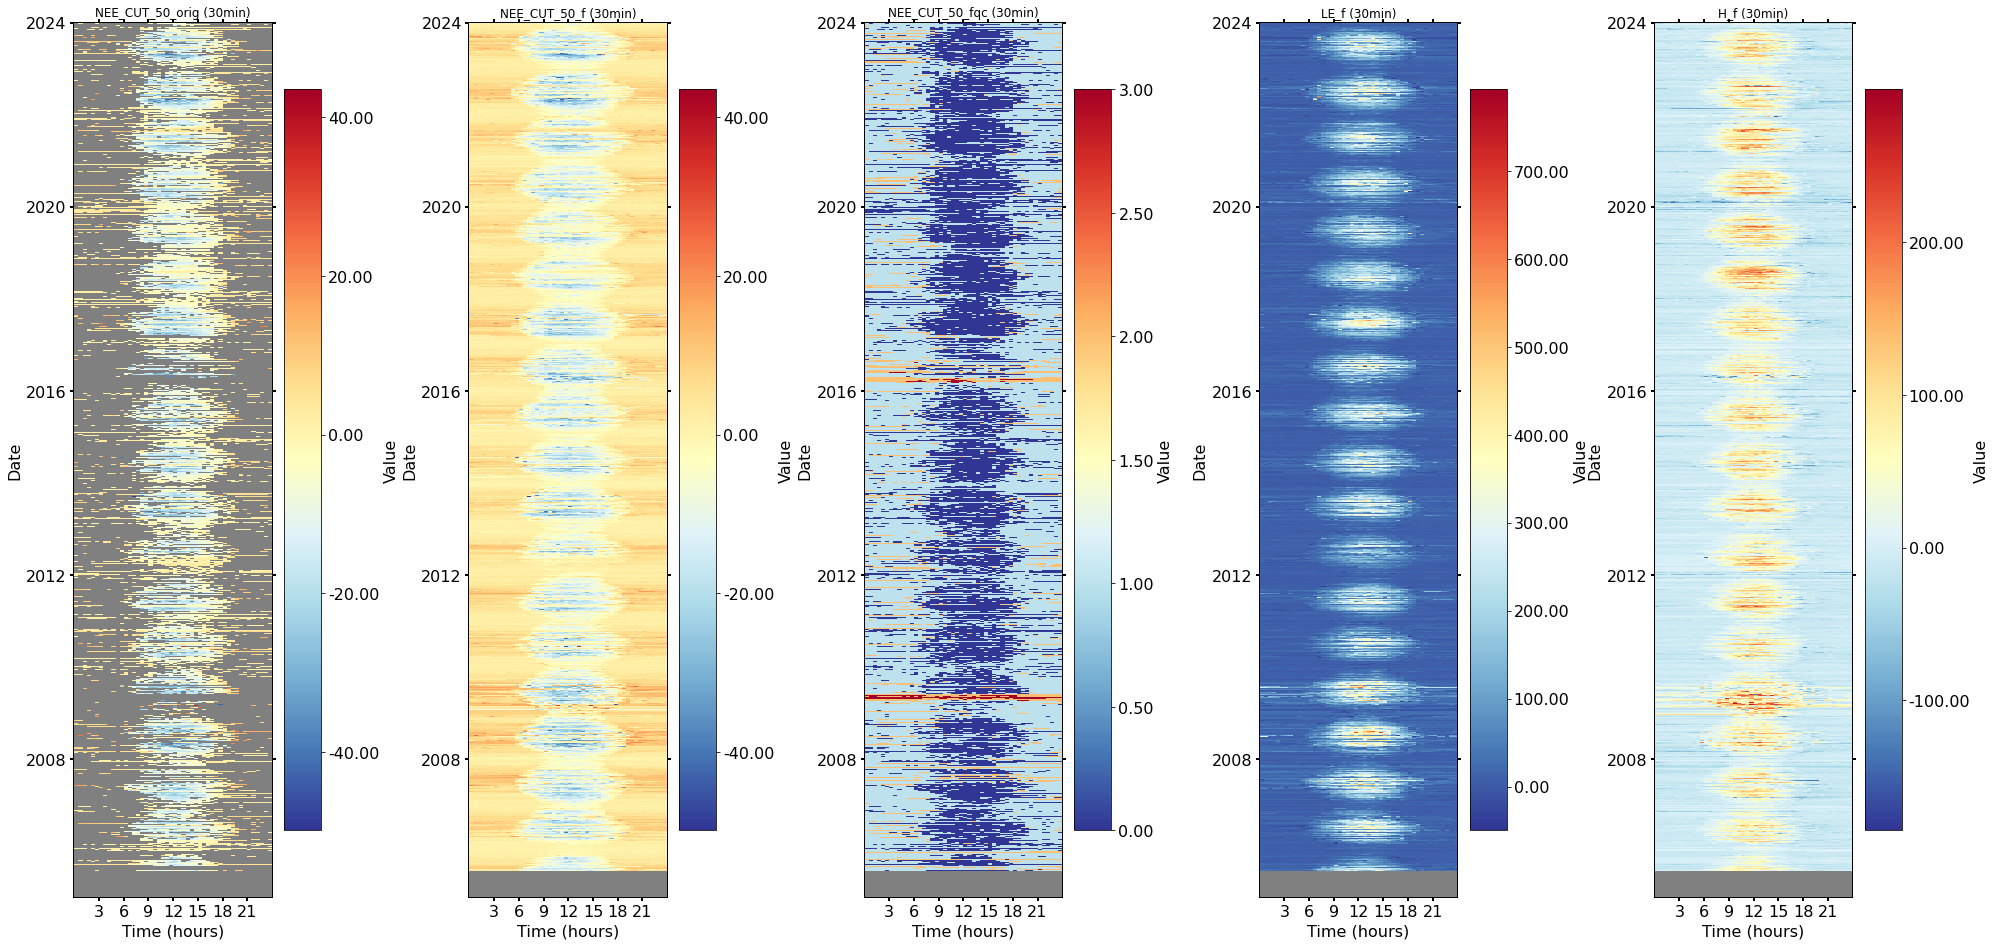

In [10]:
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(facecolor='white', figsize=(27, 13.5), dpi=72)
gs = gridspec.GridSpec(1, 5)  # rows, cols
gs.update(wspace=0.6, hspace=0.1, left=0.03, right=0.97, top=0.95, bottom=0.05)
ax1 = ax_series = fig.add_subplot(gs[0, 0])
ax2 = ax_series = fig.add_subplot(gs[0, 1])
ax3 = ax_series = fig.add_subplot(gs[0, 2])
ax4 = ax_series = fig.add_subplot(gs[0, 3])
ax5 = ax_series = fig.add_subplot(gs[0, 4])
HeatmapDateTime(series=merged['NEE_CUT_50_orig'], ax=ax1).plot()
HeatmapDateTime(series=merged['NEE_CUT_50_f'], ax=ax2).plot()
HeatmapDateTime(series=merged['NEE_CUT_50_fqc'], ax=ax3).plot()
HeatmapDateTime(series=merged['LE_f'], ax=ax4).plot()
HeatmapDateTime(series=merged['H_f'], ax=ax5).plot()

F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\core\plotting\cumulative.py:145: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


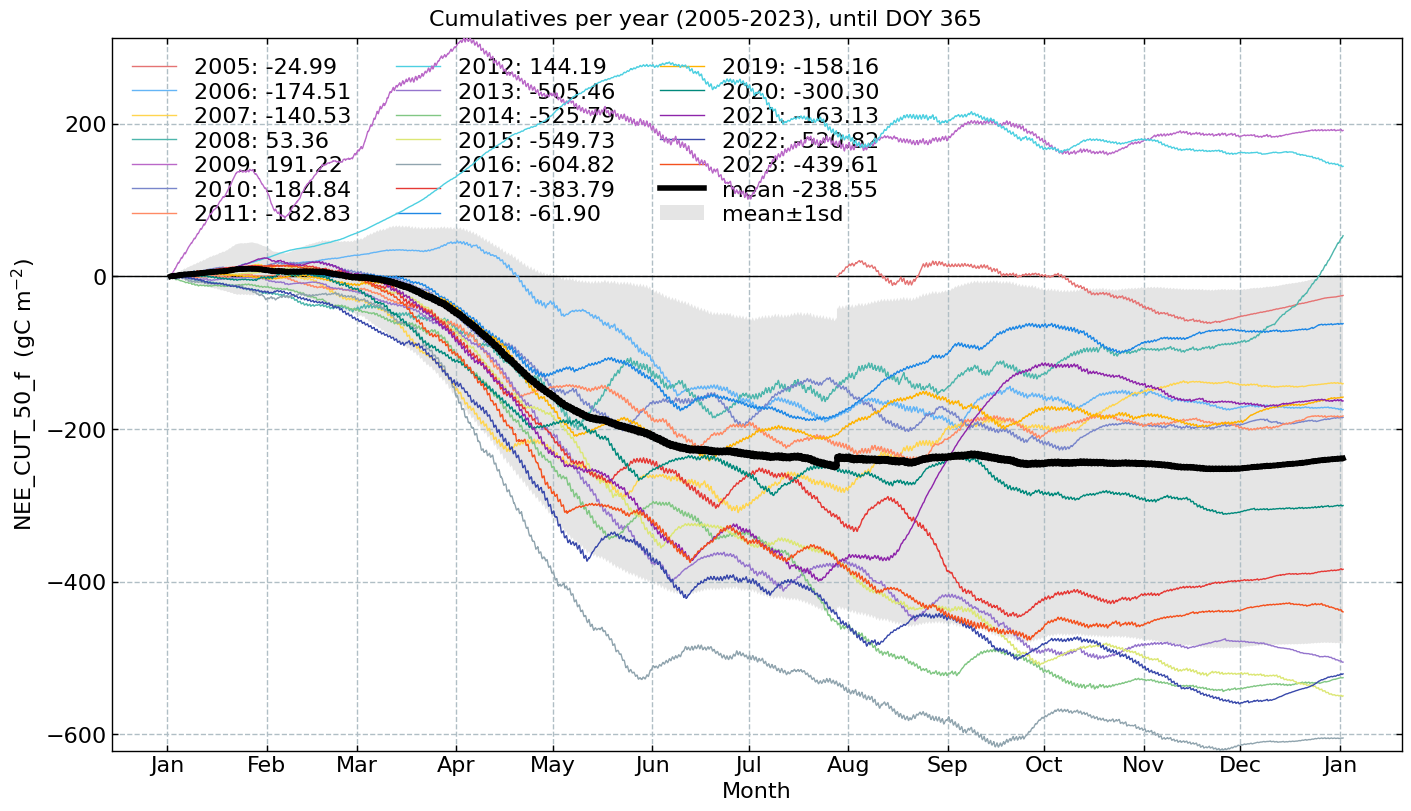

In [11]:
from diive.core.plotting.cumulative import CumulativeYear
series = merged['NEE_CUT_50_f'].copy()
# series = df['NEE_CUT_REF_f'].copy()
series = series.multiply(0.02161926)  # umol CO2 m-2 s-1 --> g C m-2 30min-1
series_units = r'($\mathrm{gC\ m^{-2}}$)'
# series_units = '(umol CO2 m-2 s-1)'
# series = df['VPD_f'].copy()
# series_units = '(hPa)'
# series = df['Tair_f'].copy()
# series_units = '(°C)'
CumulativeYear(
    series=series,
    series_units=series_units,
    yearly_end_date=None,
    # yearly_end_date='08-11',
    start_year=2005,
    end_year=2023,
    show_reference=True,
    excl_years_from_reference=None,
    # excl_years_from_reference=[2022],
    # highlight_year=2022,
    highlight_year_color='#F44336').plot()